# <b><div style = 'text-align: center; color: #1f77b4'>RNN FOR MUSIC GENERATION</div><b>
#### <h5 style = 'text-align: center; color: #000000'>40.319 Statistical and Machine Learning (Spring Term 2024) Project Report </h5>
#### <h5 style = 'text-align: center; color: #000000'>Submitted by Adharsha Sam Edwin Sam Devahi & Ryan Seah Yu Wei on April 19, 2024</h5>

## <p style = 'color: #1f77b4'><b>TABLE OF CONTENTS</b></p>
* [1. THEORY](#theory)
    * [1.1 Recurrent Neural Network (RNN)](#rnn)
    * [1.2 Long Short-Term Memory (LSTM)](#lstm)
* [2. CONTEXT: Related Concepts & Applications](#context)
* [3. PACKAGES: Essential Libraries for Tutorial](#packages)
* [4. HOOK: Why RNN for Music Generation?](#hook)
* [5. APPLICATION](#application)
    * [5.1 Audio Data Pre-Processing](#data-pre-processing)
    * [5.2 RNN Model Building](#rnn-model-building)
    * [5.3 RNN Model Training](#rnn-model-training)
    * [5.4 RNN Model Predictions](#rnn-model-predictions)
* [6. SOURCES](#sources)

## <a style = 'color: #1f77b4' class = 'anchor' id = 'theory'><b>1. THEORY</b></a>
## <a style = 'color: #1f77b4' class = 'anchor' id = 'rnn'><b>1.1 Recurrent Neural Network (RNN)</b></a>

Recurrent Neural Network (RNN) is a type of artificial neural network which is specifically designed to process & predict sequential data such as time series data.

An RNN consists primarily of 3 layers: input, middle & output.

<div>
<left><img src="working_of_rnn.png" width="700"/></left>
</div>

(a) At each time step t, RNN takes in an input $ x_t $.

(b) It maintains a hidden state  $ h_t $ representing memory.

(c) The RNN may then produce an output $ y_t $ at at each step.

RNNs standardize different activation functions, weights & biases to ensure that each hidden layer has the same parameters. This saves on complexity because only one hidden layer will be created & RNNs will loop over that layer as many times as required.

**DRAWBACKS OF RNN**

The following issues that occur during the gradient descent process in model training are defined by the size of the gradient which is the slope of the loss function along the error curve.

- **Exploding Gradients:** When the gradient is too large, the model weights continue to grow larger until they are eventually represented as NaN. When this happens, the RNN model is no longer stable.

- **Vanishing Gradients:** When the gradient is too small, the model weights continue to shrink smaller until they become insignificant. When this happens, the RNN model can no longer learn.

## <a style = 'color: #1f77b4' class = 'anchor' id = 'lstm'><b>1.2 Long Short-Term Memory (LSTM)</b></a>

Long Short-Term Memory (LSTM) is a variant of RNN that is well-suited for handling sequential data with long-term dependencies. It also addresses the issue of vanishing gradients by introducing a sophisticated gating mechanism which regulates information flow & selectively recalls or forgets information passing through the network over extended periods.

(a) At each time step t, LSTM takes in an input $ x_t $. 

(b) It maintains a hidden state $ h_t $ for short-term memory. 

(c) It introduces a cell state $ c_t $ designed to store long-term information.

(d) The LSTM may then produce an output $ y_t $ at each step.

LSTMs overcome the vanishing gradient problem of RNNs by using the forget, input & output gates shown below:

* **Forget Gate:** Decides what information to discard from the cell state.

* **Input Gate:** Determines which new information to store in the cell state.

* **Output Gate:** Controls what parts of the cell state are used to generate the output.

<div>
<left><img src="working_of_lstm.png" width="700"/></left>
</div>

**TECHNICAL EXPLANATION OF THE LSTM ARCHITECTURE**

- **Cell State:** is the core memory component, carrying information along the sequence. It starts as $ c_{t-1} $.

- **Forget Gate:** determines what information should be discarded ('forget' operation) from the Cell State. Values closer to 1 indicate that the corresponding piece of information in the previous cell state should be retained. This is done multiplicatively & with a sigmoid function.

<b><i>Formula:</i></b> $$ f_t = \sigma (W_f [h_{t-1} , x_t] + b_f) $$

- **Input Gate:** controls what new information should be added ('add' operation) to the Cell State. Values between 0 and 1 decide which parts of the new information will be added. Additionally, a candicate cell state vector $ \tilde{C}_{t} $ is created, containing potentially new information derived from the current input & previous hidden state, scaled by the tanh function. This is done additively & with a sigmoid function.

<b><i>Formula:</i></b> $$ i_t = \sigma (W_i [h_{t-1} , x_t] + b_i) $$
$$ \tilde{C}_{t} = tanh (W_c [h_{t-1} , x_t] + b_c) $$

- **Cell State Update:** combines both 'forget' & 'add' operations to form the new, updated cell state $ C_t $. This is done by summation.

<b><i>Formula:</i></b> $$ C_t = f_t C_{t-1} + i_t \tilde{C}_{t} $$

- **Output Gate:** decides what information from the cell state should be used in the output. It uses a sigmoid function to decide what to output & then applies the tanh function to the cell state to push the values to be between -1 and 1.

<b><i>Formula:</i></b> $$ o_t = \sigma (W_o [h_{t-1} , x_t] + b_o) $$

## <a style = 'color: #1f77b4' class = 'anchor' id = 'context'><b>2. CONTEXT: Related Concepts & Applications</b></a>

The key concepts discussed in this tutorial come under the wing of **Neural Networks**.

In relation to 40.319 Statistical & Machine Learning, it is similar to Convolutional Neural Networks covered in Week 6. One-dimensional sequential CNN model was used to predict future air passenger volumes & stock prices that are dependent on previous data values. Similarly, sequential RNN model can be used to predict musical notes based on past notes.

The RNN-LSTM model – in this particular use case – is used to capture long-term dependencies in audio data in order to generate good sounding music. Other applications of this variant of RNN include sentiment analysis, language modeling, speech recognition & video analysis.

## <a style = 'color: #1f77b4' class = 'anchor' id = 'packages'><b>3. PACKAGES: Essential Libraries for Tutorial</b></a>

**The following Python packages were used for this tutorial:**

* os
* pathlib
* glob
* librosa
* matplotlib
* pretty_midi
* numpy
* pandas
* collections
* tensorflow
* ipython

## <a style = 'color: #1f77b4' class = 'anchor' id = 'hook'><b>4. HOOK: Why RNN for Music Generation?</b></a>

25 royalty-free piano music MP3 audio files were collected from Free Music Archive for this tutorial. A directory `audio_data` was created in a Google Colab Jupyter Notebook to store these MP3 audio files.

In [ ]:
!mkdir audio_data

import os
from pathlib import Path

os.chdir('/content/audio_data')
directory = Path('/content/audio_data')

The MP3 audio files were then sorted in alphabetical order & the first audio file `Blissful Serenity.mp3` was chosen as the sample audio file.

In [ ]:
from glob import glob

audio_data_mp3 = glob('*.mp3')
audio_data_mp3.sort()
sample_audio = audio_data_mp3[0]
print(sample_audio)

Blissful Serenity.mp3


Since music is sequential data, sequential machine learning models like Recurrent Neural Network can be used to generate new music.

The Python package `librosa` which is used for audio analysis, along with `matplotlib` were used to represent the sample MP3 audio file as a waveform plot.

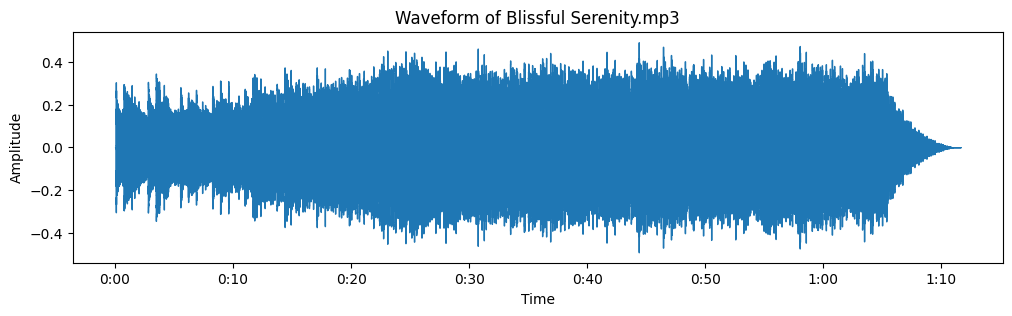

In [ ]:
import librosa

audio, sr = librosa.load(sample_audio)

import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 3))
plt.title('Waveform of Blissful Serenity.mp3')
plt.xlabel('Time')
plt.ylabel('Amplitude')
librosa.display.waveshow(audio)

This data visualization helps solidify our understanding that audio data is indeed sequential data, where a specific amplitude value of the sound wave is associated with every timestamp.

## <a style = 'color: #1f77b4' class = 'anchor' id = 'application'><b>5. APPLICATION</b></a>
## <a style = 'color: #1f77b4' class = 'anchor' id = 'data-pre-processing'><b>5.1 Audio Data Pre-Processing</b></a>

MIDI (Musical Instrument Digital Interface) files contain information on what musical notes are played, when they are played & how long or loud each musical note should be.

Since RNN can only work with MIDI files & not the actual MP3 audio files themselves, our 25 MP3 files selected as train data were converted into MIDI files.

A directory `train_data_midi` was created to store 25 MIDI files which were used to train our RNN model.

In [ ]:
!mkdir train_data_midi

os.chdir('/content/audio_data/train_data_midi')
directory_midi = Path('/content/audio_data/train_data_midi')

In [ ]:
train_data_midi = glob('*.mid')
train_data_midi.sort()

print(train_data_midi)
print('Number of Midi Files for RNN Model Training:', len(train_data_midi))

['Blissful Serenity.mid', 'Christmas Jazz.mid', 'Daybreak.mid', 'Deserts of Gaza.mid', 'Fairies.mid', 'Film.mid', 'For the Needed Rain.mid', 'Guten Tag.mid', 'Hours Gone Forever.mid', "I'll Stay Here Tonight.mid", 'Improvisation.mid', 'In This Romantic Night.mid', 'Intentional Response.mid', "It's All Around You.mid", 'Laserdisc.mid', 'Melody of Romance.mid', 'Night.mid', 'Nonduno.mid', 'Polarity.mid', 'Positive Weekend.mid', 'Rain.mid', 'Reflection.mid', 'Serene Dreamscape.mid', 'Space Out.mid', 'The Subtle Triumph.mid']
Number of Midi Files for RNN Model Training: 25


The package `pretty_midi` makes handling MIDI data easy in Python & offers in-built packages for parsing, modifying & analyzing MIDI files.

After sorting MIDI files in alphabetical order, `Blissful Serenity.mid` was chosen as the sample file.

In [ ]:
import pretty_midi

sample_midi = train_data_midi[0]
print(sample_midi)

Blissful Serenity.mid


The following code chunk helps us visualize the musical instrument(s) detected in the sample audio file. As expected, there is only one instrument: *Acoustic Grand Piano*.

In [ ]:
pm = pretty_midi.PrettyMIDI(sample_midi)

print('Number of Instruments in Blissful Serenity.mid:', len(pm.instruments))

instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)

print('Instrument Used:', instrument_name)

Number of Instruments in Blissful Serenity.mid: 1
Instrument Used: Acoustic Grand Piano


A function `midi_to_notes` was written to prepare a Pandas DataFrame that can store the names of musical notes along with information on the pitch, start, end, step & duration from the 25 MIDI files.

In [ ]:
import numpy as np
import pandas as pd
import collections

def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key = lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['note'].append(pretty_midi.note_number_to_name(note.pitch))
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

Here are the first 5 rows of the Pandas DataFrame containing information about all musical notes in `Blissful Serenity.mid`:

In [ ]:
sample_notes = midi_to_notes(sample_midi)
print(sample_notes.head(5))

  note  pitch     start       end      step  duration
0   G4     67  0.000000  0.023256  0.000000  0.023256
1  F#2     42  0.011628  5.500000  0.011628  5.488372
2  F#4     66  0.023256  0.453488  0.011628  0.430233
3  C#4     61  0.046512  0.674419  0.023256  0.627907
4  F#4     66  0.476744  0.744186  0.430233  0.267442


The following code chunk helps us visualize the total number of parsed notes found in the 25 MIDI files.

In [ ]:
num_files = 25

all_notes = []
for m in train_data_midi[:num_files]:
  notes = midi_to_notes(m)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)
print('Number of Parsed Notes:', all_notes.shape[0])

Number of Parsed Notes: 156081


In [ ]:
import tensorflow as tf

key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis = 1)
notes_dataset = tf.data.Dataset.from_tensor_slices(train_notes)

The function `create_sequences` was written to enable the RNN model to take a set of sequences as inputs & accurately predict the next notes. Each note is represented as an input array of [pitch, step, duration].

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset,
    sequence_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence & label examples."""
  sequence_length = sequence_length + 1

  # Take 1 extra for the labels
  windows = dataset.window(sequence_length, shift = 1, stride = 1, drop_remainder = True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(sequence_length, drop_remainder = True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size, 1.0, 1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i, key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls = tf.data.AUTOTUNE)

`create_sequences` function was then used to curate the train data for the RNN model.

In [ ]:
sequence_length = 50
vocab_size = 128
sequence_dataset = create_sequences(notes_dataset, sequence_length, vocab_size)

In [ ]:
batch_size = 64
buffer_size = all_notes.shape[0] - sequence_length  # the number of items in the dataset

train_dataset = (sequence_dataset
                 .shuffle(buffer_size)
                 .batch(batch_size, drop_remainder=True)
                 .cache()
                 .prefetch(tf.data.experimental.AUTOTUNE))

## <a style = 'color: #1f77b4' class = 'anchor' id = 'rnn-model-building'><b>5.2 RNN Model Building</b></a>

The function `mse_with_positive_pressure` which is a custom loss function was written to make the model output only positive values. This is because negative values are invalid outputs since they would not be able to produce musical notes. This loss function was applied to minimize `step` & `duration`. `SparseCategoricalCrossentropy` is used as the loss function for `pitch`.

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_predicted: tf.Tensor):
  mse = (y_true - y_predicted) ** 2
  positive_pressure = 10 * tf.maximum(-y_predicted, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [ ]:
tf.keras.utils.set_random_seed(123)

input_shape = (sequence_length, 3)

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name = 'pitch')(x),
  'step': tf.keras.layers.Dense(1, name = 'step')(x),
  'duration': tf.keras.layers.Dense(1, name = 'duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure
}

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.25)

model.compile(loss = loss, optimizer = optimizer)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 50, 3)]              0         []                            
                                                                                                  
 lstm_1 (LSTM)               (None, 128)                  67584     ['input_2[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_1[0][0]']              
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm_1[0][0]']              
                                                                                            

Upon finding the training loss, `pitch_loss` is observed to be substantially higher than `duration_loss` & `step_loss`.

In [ ]:
losses = model.evaluate(train_dataset, return_dict = True)
losses

2437/2437 [==============================] - 84s 34ms/step - loss: 4.9941 - duration_loss: 0.1339 - pitch_loss: 4.8535 - step_loss: 0.0067


{'loss': 4.994093418121338,
 'duration_loss': 0.13390806317329407,
 'pitch_loss': 4.853459358215332,
 'step_loss': 0.006721032317727804}

Since the aim is to minimize the loss function for any machine learning algorithm, a smaller weight was assigned to `pitch` in order to reduce the overall training loss.

In [ ]:
model.compile(
    loss = loss,
    loss_weights = {
        'pitch': 0.01,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer = optimizer)

In [ ]:
model.evaluate(train_dataset, return_dict = True)

2437/2437 [==============================] - 86s 35ms/step - loss: 0.1892 - duration_loss: 0.1339 - pitch_loss: 4.8535 - step_loss: 0.0067


{'loss': 0.18916381895542145,
 'duration_loss': 0.13390806317329407,
 'pitch_loss': 4.853459358215332,
 'step_loss': 0.006721032317727804}

## <a style = 'color: #1f77b4' class = 'anchor' id = 'rnn-model-training'><b>5.3 RNN Model Training</b></a>

Since too many epochs results in the overfitting of train data & too few results in the underfitting of train data, early stopping is used as a regularization technique that allows us to specify an arbitrary large number of training epochs (here, 500 epochs) & stop model training when a monitored metric (here, `loss`) has stopped improving.

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only = True),
    tf.keras.callbacks.EarlyStopping(
        monitor = 'loss',
        patience = 5,
        verbose = 1,
        restore_best_weights = True),
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs = 500,
    callbacks = callbacks,
)

Epoch 1/500
2437/2437 [==============================] - 201s 81ms/step - loss: 3.3632 - duration_loss: 1.6508 - pitch_loss: 5.8170 - step_loss: 1.6542
Epoch 2/500
2437/2437 [==============================] - 234s 96ms/step - loss: 3.0522 - duration_loss: 1.4486 - pitch_loss: 5.7406 - step_loss: 1.5462
Epoch 3/500
2437/2437 [==============================] - 198s 81ms/step - loss: 3.0592 - duration_loss: 1.4545 - pitch_loss: 5.7771 - step_loss: 1.5470
Epoch 4/500
2437/2437 [==============================] - 197s 81ms/step - loss: 3.0589 - duration_loss: 1.4540 - pitch_loss: 5.7527 - step_loss: 1.5474
Epoch 5/500
2437/2437 [==============================] - 197s 81ms/step - loss: 3.0578 - duration_loss: 1.4528 - pitch_loss: 5.7560 - step_loss: 1.5474
Epoch 6/500
2437/2437 [==============================] - 198s 81ms/step - loss: 3.0553 - duration_loss: 1.4504 - pitch_loss: 5.7861 - step_loss: 1.5470
Epoch 7/500
2437/2437 [==============================] - 198s 81ms/step - loss: 3.0517 -

Here is the loss plot that displays training loss history.

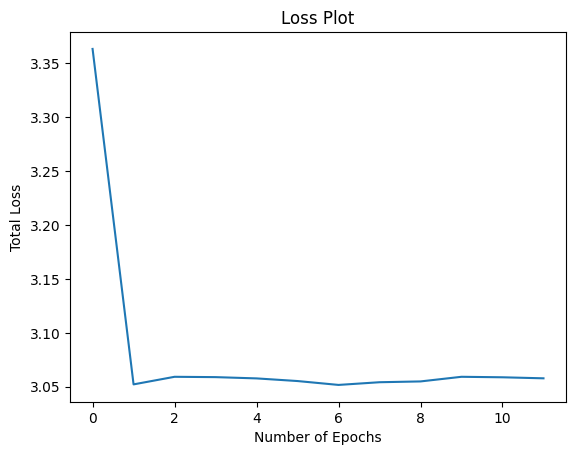

In [ ]:
plt.plot(history.epoch, history.history['loss'], label = 'total loss')
plt.title('Loss Plot')
plt.xlabel('Number of Epochs')
plt.ylabel('Total Loss')
plt.show()

## <a style = 'color: #1f77b4' class = 'anchor' id = 'rnn-model-predictions'><b>5.4 RNN Model Predictions</b></a>

The function `predict_next_note` was written to output RNN model's prediction of the next note.

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples = 1)
  pitch = tf.squeeze(pitch, axis = -1)
  duration = tf.squeeze(duration, axis = -1)
  step = tf.squeeze(step, axis = -1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [ ]:
temperature = 1.0 # controls the randomness of RNN model predictions
num_predictions = 25 # sets the number of musical notes for the RNN model to generate

next_notes = np.stack([sample_notes[key] for key in key_order], axis = 1)

# the initial sequence of notes; pitch is normalized similar to training sequences
input_notes = (next_notes[:sequence_length]/np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for p in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step + 0.5
  end = start + duration
  input_note = (pitch, step + 0.5, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis = 0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis = 0)
  prev_start = start

1/1 [==============================] - 0s 42ms/step


Here are the first 5 rows of the Pandas DataFrame containing information about the 25 musical notes generated by the RNN model:

In [ ]:
generated_notes = pd.DataFrame(generated_notes, columns = (*key_order, 'start', 'end'))
print(generated_notes.head(5))

   pitch  step  duration  start     end
0     36   0.5    1.0394    0.5  1.5394
1     50   0.5    1.0394    1.0  2.0394
2     93   0.5    1.0394    1.5  2.5394
3     58   0.5    1.0394    2.0  3.0394
4     77   0.5    1.0394    2.5  3.5394


The function `notes_to_midi` was written to convert the AI generated musical notes into 1 MIDI file.

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 70,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

`output.mid` is the output MIDI file containing all 25 musical notes generated by the RNN model!

In [ ]:
output_midi = 'output.mid'
output_pm = notes_to_midi(generated_notes, out_file = output_midi, instrument_name = instrument_name)

`output.mid` was then converted to `output.mp3`. Please take a listen of the 25 musical notes generated by the RNN model! ♬

In [1]:
import IPython
import IPython.display as ipd

ipd.Audio('output.mp3')

## <a style = 'color: #1f77b4' class = 'anchor' id = 'sources'><b>6. SOURCES</b></a>

- https://www.ibm.com/topics/recurrent-neural-networks

- https://www.youtube.com/watch?v=y9PLF2GsD-c

- https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/

- https://www.youtube.com/watch?v=LfnrRPFhkuY

- https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714

- https://gemini.google.com/share/9fca982b0ecf

- https://www.mathworks.com/discovery/lstm.html

- https://freemusicarchive.org/home

- https://www.lifewire.com/midi-file-2621979

- https://www.bearaudiotool.com/mp3-to-midi

- https://www.tensorflow.org/tutorials/audio/music_generation

- https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

- https://www.freeconvert.com/midi-to-mp3